In [3]:
import os
import sys
module_path = os.path.abspath(os.path.join(os.getcwd().split('notebook_examples')[0]+'general-colocation'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [4]:
import pandas as pd
import geopandas as gpd
import colocation
import utils

In [3]:
data = pd.read_csv('../../data/Minneapolis_Input.csv')

In [4]:
data.head(5)

,safegraph_place_id,location_name,brands,top_category,sub_category,naics_code,latitude,longitude,city,region
0,sg:80ed5aeaee334840be638459707fbdc3,Walker Art Center,NaN,Other Miscellaneous Store Retailers,Art Dealers,453920.0,44.967992,-93.288748,Minneapolis,MN
1,sg:d468aec1a90a437185360b5c1b1d00df,Bauhaus Brew Labs,NaN,Beverage Manufacturing,Breweries,312120.0,45.000795,-93.244703,Minneapolis,MN
2,sg:555149b9b9ce4884a013083c10945892,Nicollet Chiropractic Clinic,NaN,Offices of Other Health Practitioners,Offices of Chiropractors,621310.0,44.955720,-93.280312,Minneapolis,MN
3,sg:a1a36cc57f4644018fa74e0abfa75023,Minneapolis Fire Department Station 4,NaN,"Justice, Public Order, and Safety Activities",Fire Protection,922160.0,44.989414,-93.287113,Minneapolis,MN
4,sg:c15277b450de412fa40fedfc0e240732,Simbacraftware,NaN,Clothing Stores,Women's Clothing Stores,448120.0,44.948871,-93.260741,Minneapolis,MN


In [5]:
data['pos'] = gpd.points_from_xy(data.longitude, data.latitude)

|C1| = 106, |P1| = 106, |R1| = 0, Rows in T1 = 6055, Elapsed Time: 0:00:00.105796
|C2| = 5565, |P2| = 47, |R2| = 51, Rows in T2 = 105967, Elapsed Time: 0:00:24.761670
|C3| = 31, |P3| = 7, |R3| = 21, Rows in T3 = 104080, Elapsed Time: 0:00:26.899515


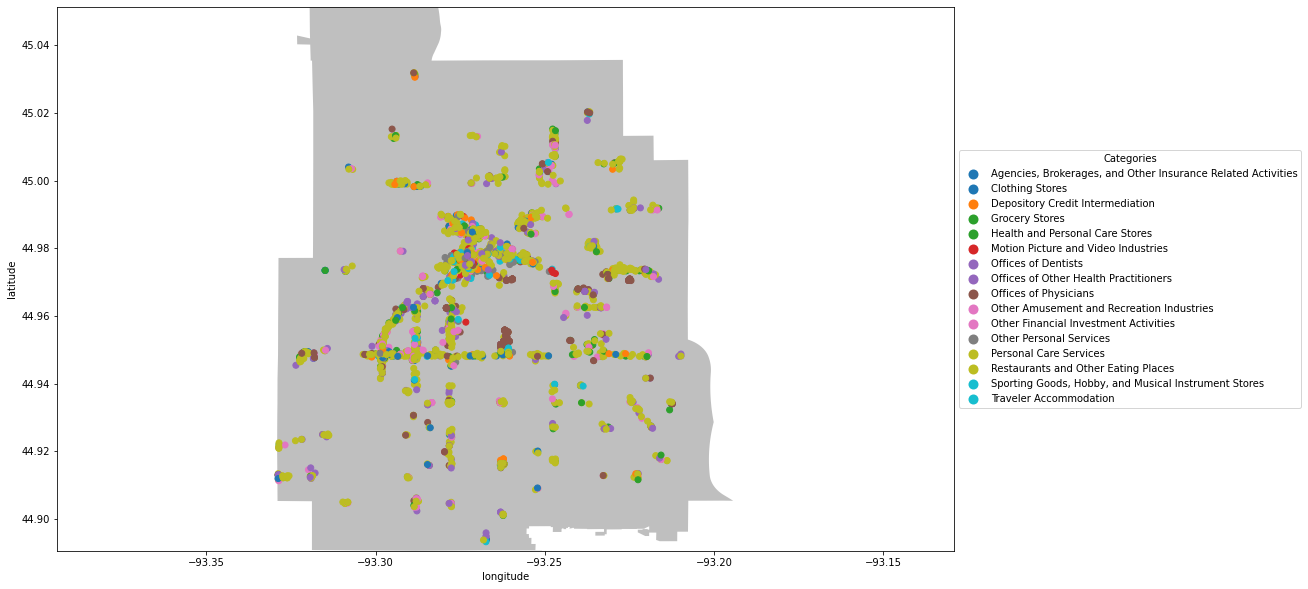

In [6]:
T, R = colocation.general(data, 'pos', 'top_category', 'safegraph_place_id', threshold=100, theta=0.4, plot=True, out_plot='full_out_plot', out_csv='full_out_csv', shape_file='PolyMN/Polygon_MN.shp')

In [7]:
# print rules for size 3 colocations in form {A,B} => C (prevalence of {A,B,C}, conditional probability of {A,B}=>C)
out = {}
for r in R:
    if len(r.items) == 3:
        out[r.antecedent] = r

for r in sorted(out.keys()):
    print(out[r])

{Clothing Stores, Personal Care Services} => Restaurants and Other Eating Places (0.4287, 0.9979)
{Clothing Stores, Restaurants and Other Eating Places} => Personal Care Services (0.4287, 0.9408)
{Depository Credit Intermediation, Other Personal Services} => Traveler Accommodation (0.4034, 0.918)
{Depository Credit Intermediation, Traveler Accommodation} => Other Personal Services (0.4034, 0.9262)
{Health and Personal Care Stores, Personal Care Services} => Restaurants and Other Eating Places (0.4129, 0.9828)
{Health and Personal Care Stores, Restaurants and Other Eating Places} => Personal Care Services (0.4129, 0.9631)
{Offices of Other Health Practitioners, Personal Care Services} => Restaurants and Other Eating Places (0.4818, 0.9693)
{Offices of Other Health Practitioners, Restaurants and Other Eating Places} => Personal Care Services (0.4818, 0.9128)
{Offices of Physicians, Personal Care Services} => Restaurants and Other Eating Places (0.4121, 0.9436)
{Offices of Physicians, Res

In [8]:
# Sample some of the 3-colocations
T[-1].sample(10)

,cat1,id1,cat2,id2,cat3,id3,pos3
492940,Grocery Stores,sg:ab7d713006434554a4dad2f6f4bc8691,Personal Care Services,sg:dd6c0e55d8b340d6b6190bb4ce488e61,Restaurants and Other Eating Places,sg:5f0779c6a9f348f7bb9b8d34be4a7a85,POINT (-93.289 44.948)
187778,Clothing Stores,sg:ea225b63f90646c28d97f1df83e2bb36,Health and Personal Care Stores,sg:f14c061661574f92b4087dcaf6d48a52,Personal Care Services,sg:2a4955d961794362bfdcd95a1d076a21,POINT (-93.274 44.976)
741638,Offices of Other Health Practitioners,sg:88b4e201f8d246e7a58a03218f65e06e,Offices of Physicians,sg:9d6a77f69ffc4330888a6f568126b737,Restaurants and Other Eating Places,sg:1d9a85067f9b4daf9d6a851726b4b265,POINT (-93.270 44.977)
5486,"Agencies, Brokerages, and Other Insurance Rela...",sg:0f078a682cc64e4cb3a1d8b64122d603,Depository Credit Intermediation,sg:7fc2c153e04049e386e9ec529c453d54,Traveler Accommodation,sg:24080f164e994961b2870d618dc241c5,POINT (-93.270 44.978)
776002,Offices of Other Health Practitioners,sg:98c978d99a6f4656be785ffc9aa4473e,Offices of Physicians,sg:a29f3e1d6bdb4d3da639728d33adc013,Restaurants and Other Eating Places,sg:5ffa72f4c32043ea84ef26f600dd51ee,POINT (-93.275 44.976)
805894,Offices of Other Health Practitioners,sg:dbe672fb112542e686f7f4ca27c35b6c,Other Amusement and Recreation Industries,sg:47022c2a67e04727ad50489f55b30cef,Restaurants and Other Eating Places,sg:c518f6335e5e40859599e1cfdfebf3af,POINT (-93.268 44.977)
587403,Health and Personal Care Stores,sg:2ac03746b6a642d6944b32f4bbe15487,Offices of Physicians,sg:5c1d4cede8c84ae8807f2e739c846806,Personal Care Services,sg:4cafaec29f2540d591982046732905d2,POINT (-93.274 44.976)
917399,Offices of Physicians,sg:b28c4f5901084068b08947d2d8523992,Personal Care Services,sg:cc7a3577ab614f58b33d819dcb6275c8,Restaurants and Other Eating Places,sg:22cea382435746648a76b4c2a0794f14,POINT (-93.274 44.976)
196380,Clothing Stores,sg:6a8024dc95c84516a1af3c636b13dd19,Personal Care Services,sg:7ae2fb3101204a669dfa7989575fc819,Restaurants and Other Eating Places,sg:6d0540bce9d14677b97c0b43fb2fafa3,POINT (-93.288 44.947)
14670,Clothing Stores,sg:5ad5dac5119f4357b718a36c28f85658,Health and Personal Care Stores,sg:9cab342a15af48d287adef39278b380a,Restaurants and Other Eating Places,sg:6898d5274af248158f3614fb26866a59,POINT (-93.272 44.974)
